In [1]:
import pandas as pd

# Load each dataset
df1 = pd.read_csv('nafld1.csv')  # Replace with actual file path
df2 = pd.read_csv('nafld2.csv')
df3 = pd.read_csv('nwtco.csv')

# Print the first few rows of each dataset to inspect
print(df1.head())
print(df2.head())
print(df3.head())


FileNotFoundError: [Errno 2] No such file or directory: 'nafld1.csv'

for file 1


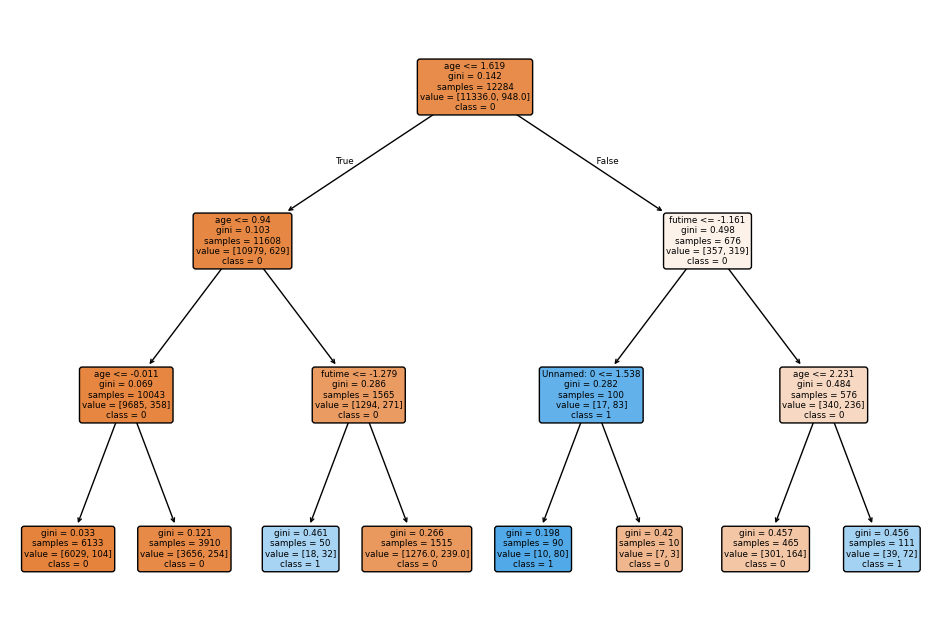

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer

# Load df1 (as an example, adapt as needed)
df1 = pd.read_csv('nafld1.csv')

# Data Preprocessing
# Fill missing values (for simplicity, using mean imputation)
imputer = SimpleImputer(strategy='mean')
df1_imputed = pd.DataFrame(imputer.fit_transform(df1.select_dtypes(include=['float64', 'int64'])), columns=df1.select_dtypes(include=['float64', 'int64']).columns)

# Extract features and target variable
X = df1_imputed.drop(columns=['status'])
y = df1['status']  # Assuming 'status' is the target

# Normalize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

# Pruning (Post-pruning)
from sklearn.tree import DecisionTreeClassifier

dt_pruned = DecisionTreeClassifier(random_state=42, max_depth=3)  # You can adjust max_depth based on your dataset
dt_pruned.fit(X_train, y_train)

# Visualize the decision tree
class_names = [str(cls) for cls in y.unique()]
plt.figure(figsize=(12,8))
plot_tree(dt_pruned, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.show()


f2

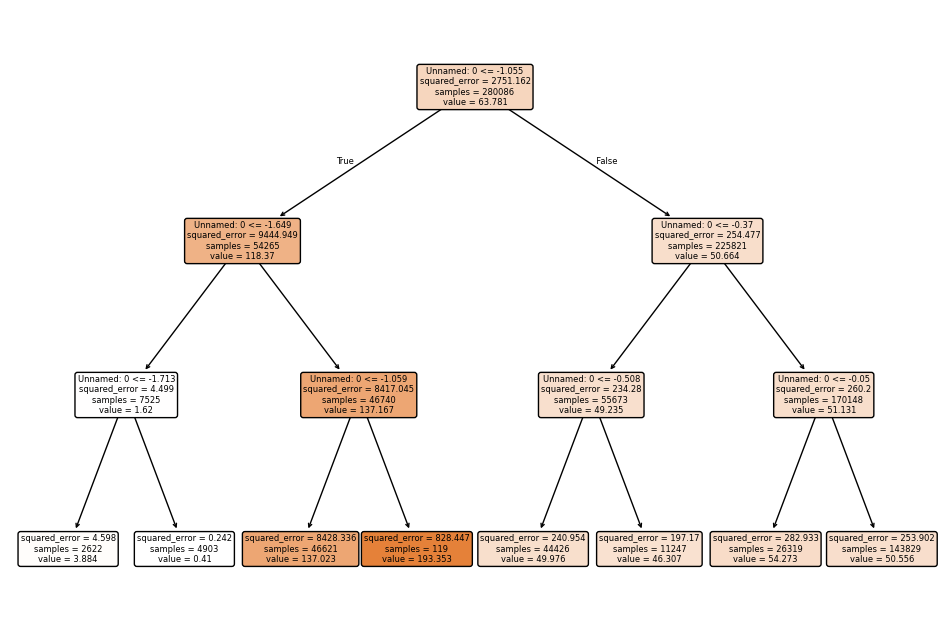

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Load df2
df2 = pd.read_csv('nafld2.csv')

# Data Preprocessing
df2_imputed = pd.DataFrame(imputer.fit_transform(df2.select_dtypes(include=['float64', 'int64'])), columns=df2.select_dtypes(include=['float64', 'int64']).columns)

# Extract features and target
X2 = df2_imputed.drop(columns=['value'])  # Modify as per the correct target variable
y2 = df2['value']  # Assuming 'value' is the target variable for df2

# Normalize numerical features
X2_scaled = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns)

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.3, random_state=42)

# Train Decision Tree Regressor (since 'value' seems continuous)
dt2 = DecisionTreeRegressor(random_state=42, max_depth=5)
dt2.fit(X2_train, y2_train)

# Pruning (Post-pruning)
dt2_pruned = DecisionTreeRegressor(random_state=42, max_depth=3)
dt2_pruned.fit(X2_train, y2_train)

# Visualize the pruned decision tree
plt.figure(figsize=(12,8))
plot_tree(dt2_pruned, filled=True, feature_names=X2.columns, rounded=True)
plt.show()


f3

In [ ]:
print(df3.columns)


Index(['Unnamed: 0', 'seqno', 'instit', 'histol', 'stage', 'study', 'rel',
       'edrel', 'age', 'in.subcohort'],
      dtype='object')


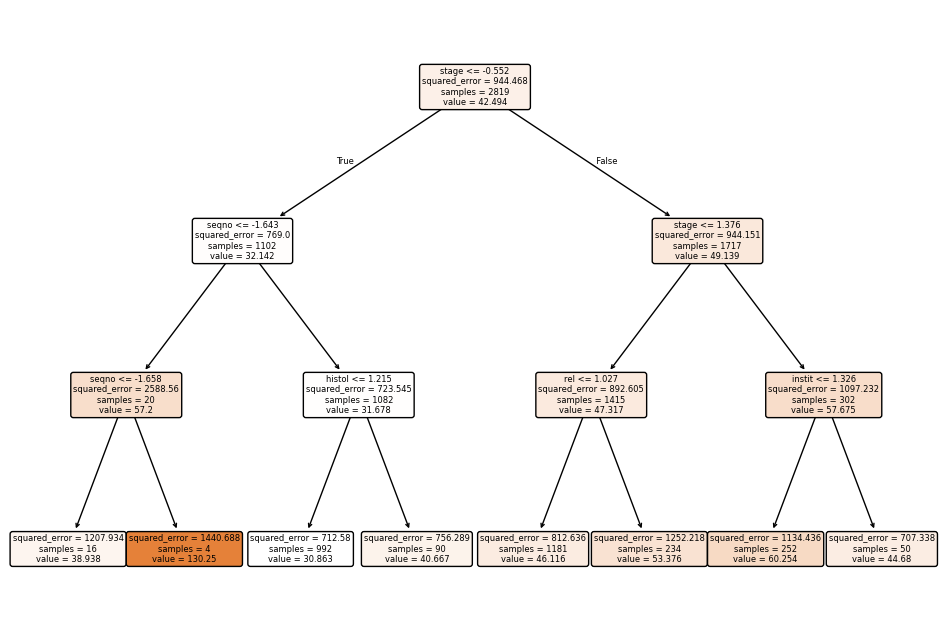

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Assume df3 is your original dataframe and 'age' is the target
imputer = SimpleImputer(strategy='mean')
df3_imputed = pd.DataFrame(imputer.fit_transform(df3), columns=df3.columns)

# Now your original code will work:
X3 = df3_imputed.drop(columns=['age'])  # Drop 'age' as it's the target
y3 = df3['age']  # 'age' is now the target variable

# Normalize
scaler = StandardScaler()
X3_scaled = pd.DataFrame(scaler.fit_transform(X3), columns=X3.columns)

# Train-test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.3, random_state=42)

# Train Decision Tree Regressor
dt3 = DecisionTreeRegressor(random_state=42, max_depth=5)
dt3.fit(X3_train, y3_train)

# Pruned tree
dt3_pruned = DecisionTreeRegressor(random_state=42, max_depth=3)
dt3_pruned.fit(X3_train, y3_train)

# Visualize
plt.figure(figsize=(12,8))
plot_tree(dt3_pruned, filled=True, feature_names=X3.columns, rounded=True)
plt.show()
